<a href="https://colab.research.google.com/github/Yosesotomayor/yNN/blob/main/PytorchIris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [316]:
import torch
import torch.nn as nn
import torch.nn.functional as F

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [317]:
# Create our model class, inherited from nn.Module
class neuralNetwork2L(nn.Module):
    def __init__(self, input_features, hidden_layer_1, hidden_layer_2, output_features):
        super().__init__()
        self.input_features = input_features
        self.hidden_layer_1 = hidden_layer_1
        self.hidden_layer_2 = hidden_layer_2
        self.output_features = output_features

        self.full_connected_1 = nn.Linear(input_features, hidden_layer_1)
        self.full_connected_2 = nn.Linear(hidden_layer_1, hidden_layer_2)
        self.output_connected = nn.Linear(hidden_layer_2, output_features)

    def forward(self, x):
        x = F.relu(self.full_connected_1(x))
        x = F.relu(self.full_connected_2(x))
        x = self.output_connected(x)

        return x

In [318]:
# Set a seed
SEED = 32

torch.manual_seed(SEED)

model = neuralNetwork2L(4, 8, 9, 3)

In [319]:
df = pd.DataFrame(load_iris(as_frame = True).data)
df['target'] = load_iris(as_frame = True).target

In [320]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [321]:
X = df.drop('target', axis=1).values
y = df['target'].values

In [322]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)

In [323]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [324]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

(torch.Size([120, 4]),
 torch.Size([30, 4]),
 torch.Size([120]),
 torch.Size([30]))

In [325]:
learning_rate = 0.01
epochs = 100

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [326]:
losses = []
for i in range(epochs):
    y_pred = model.forward(X_train)

    loss = criterion(y_pred, y_train)
    losses.append(loss.detach().numpy())

    if i % 10 == 0:
        print(f'Epoch: {i} Loss: {loss}')

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()


Epoch: 0 Loss: 1.1699321269989014
Epoch: 10 Loss: 0.9570867419242859
Epoch: 20 Loss: 0.7980871796607971
Epoch: 30 Loss: 0.6327950358390808
Epoch: 40 Loss: 0.43861737847328186
Epoch: 50 Loss: 0.2904532253742218
Epoch: 60 Loss: 0.1778070330619812
Epoch: 70 Loss: 0.11584122478961945
Epoch: 80 Loss: 0.0893637090921402
Epoch: 90 Loss: 0.077529177069664


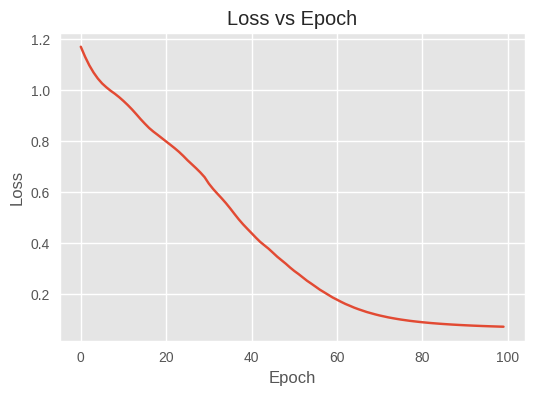

In [327]:
plt.figure(figsize=(6, 4))
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title('Loss vs Epoch')
plt.show()

In [331]:
with torch.no_grad():
    y_eval = model.forward(X_test)
    loss = criterion(y_eval, y_test)
loss

tensor(0.0538)

In [329]:
correct = 0
with torch.no_grad():
    for i, data in enumerate(X_test):
        y_val = model.forward(data)
        print(f'{i+1:2}. {str(y_val)} \t {y_test[i]} \t {y_val.argmax().item()} \t  {y_val.argmax().item() == y_test[i]}')

        # Correct or not
        if y_val.argmax().item() == y_test[i]:
            correct += 1

print(f'\n{correct} out of {len(y_test)} = {100*correct/len(y_test):.2f}% correct')

 1. tensor([-3.3646,  3.9392,  0.3720]) 	 1 	 1 	  True
 2. tensor([  7.5572,   1.1015, -11.3347]) 	 0 	 0 	  True
 3. tensor([  6.5956,   1.5027, -10.4091]) 	 0 	 0 	  True
 4. tensor([-3.3331,  4.2594,  0.0623]) 	 1 	 1 	  True
 5. tensor([-7.3782,  2.8087,  5.1605]) 	 2 	 2 	  True
 6. tensor([-7.3760,  3.9013,  4.2826]) 	 2 	 2 	  True
 7. tensor([  6.1971,   1.6470, -10.0047]) 	 0 	 0 	  True
 8. tensor([  6.6383,   1.4348, -10.4031]) 	 0 	 0 	  True
 9. tensor([-2.6753,  4.3091, -0.6392]) 	 1 	 1 	  True
10. tensor([  7.1875,   1.3812, -11.0965]) 	 0 	 0 	  True
11. tensor([-3.8318,  4.4027,  0.5246]) 	 1 	 1 	  True
12. tensor([-8.6807,  1.9994,  6.8923]) 	 2 	 2 	  True
13. tensor([-2.0678,  3.8200, -0.7571]) 	 1 	 1 	  True
14. tensor([-1.0768,  4.3741, -2.2838]) 	 1 	 1 	  True
15. tensor([-7.4965,  2.6207,  5.3287]) 	 2 	 2 	  True
16. tensor([-8.6136,  1.5508,  7.1186]) 	 2 	 2 	  True
17. tensor([-3.7761,  3.6462,  0.9487]) 	 1 	 1 	  True
18. tensor([-6.7608,  2.7754,  4.